<h1 style="text-align: center;"><img class="responsive" style="float: left;" src="https://is1-ssl.mzstatic.com/image/thumb/Purple112/v4/b5/6e/20/b56e2053-ccd2-d63f-e0fb-a1bf3774eb0b/AppIcon-0-0-1x_U007emarketing-0-0-0-10-0-0-sRGB-0-0-0-GLES2_U002c0-512MB-85-220-0-0.png/230x0w.webp" alt="" width="143" height="143" /></h1>
<h1 style="text-align: center;"><img class="responsive" style="font-size: 14px; float: right;" src="https://i0.wp.com/mosefparis1.fr/wp-content/uploads/2022/10/cropped-image-1.png?fit=532%2C540&amp;ssl=1" alt="" width="163" height="165" /></h1>
<h1 style="text-align: center;"><span style="color: #000080; font-family: arial, helvetica, sans-serif;"><strong style="font-size: 24pt;">LCL Challenge: Classe de risque</strong></span></h1>
<p style="text-align: center;"><span style="font-size: 14pt;">Scoring Immobilier: Syst&egrave;me Expert BEST&nbsp;IMMO</span></p>
<p style="text-align: center;"><span style="font-size: 10pt; font-family: verdana, geneva, sans-serif;">Lucie Gabagnou,&nbsp;Ghiles Idris,&nbsp;Armand L'Huillier,&nbsp;Yanis Rehoune</span></p>

### Installation de l'environnement de travail

#### Installation des packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scripts.firststep_dataviz import missing_rate_report

### 1. Algorithme des K-Means


Cette étape nécessite un fichier volumineux (qui n'a pas été mis dans le dossier). Il s'agit d'un jeu de données de la base temps, sur lequel on a prédit les probabilités de défaut que chaque individu (en ayant processé les variables), tout en conservant les variables quantitatives finales (cf processing). 

In [14]:
df_clustering=pd.read_csv("data/output/data_for_clustering.csv")
df = df_clustering.drop("date_debloc_avec_crd", axis=1)
print("On vérifie que les colonnes n'ont pas de valeurs manquantes")
missing_rate_df=missing_rate_report(df)

On vérifie que les colonnes n'ont pas de valeurs manquantes


,count,rate
Unnamed: 0,0,0.0
MNT_TOT_ASSURANCE_CRI,0,0.0
COUT_RACHAT_BRP,0,0.0
quotite,0,0.0
PCT_TEG_TAEG_CRI,0,0.0
MOY_ANC_PROF_BRP,0,0.0
nb_pret,0,0.0
MNT_COUT_TOT_CREDIT_CRI,0,0.0
BEST_APPORT_TX_BRP,0,0.0
COUT_PROJET_HF_AT_BRP,0,0.0


/var/folders/j3/7p5c8ygd7yg6bgkb6r90ddhm0000gn/T/ipykernel_77264/2774628289.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scale[['MNT_TOT_ASSURANCE_CRI', 'COUT_RACHAT_BRP', 'quotite', 'PCT_TEG_TAEG_CRI','BEST_APPORT_TX_BRP','proba_prediction']] = min_max_scaler.fit_transform(df_scale[['MNT_TOT_ASSURANCE_CRI', 'COUT_RACHAT_BRP', 'quotite', 'PCT_TEG_TAEG_CRI','BEST_APPORT_TX_BRP','proba_prediction']])


,MNT_TOT_ASSURANCE_CRI,COUT_RACHAT_BRP,quotite,PCT_TEG_TAEG_CRI,BEST_APPORT_TX_BRP,proba_prediction
0,0.001485,0.000000,0.088000,0.377825,0.164344,0.073365
1,0.023280,0.000000,0.023487,0.378747,0.706455,0.092829
2,0.041559,0.000000,0.081056,0.485192,0.000000,0.517652
3,0.006062,0.000000,0.014601,0.415613,0.815471,0.039024
4,0.005609,0.000000,0.025923,0.351854,0.676537,0.052643
5,0.009767,0.000000,0.001786,0.453831,0.954713,0.025978
6,0.065782,0.000000,0.030310,0.429184,0.622746,0.200321
7,0.060706,0.000000,0.041985,0.406600,0.479406,0.103701
8,0.000000,0.000000,0.020972,0.333447,0.737295,0.102503
9,0.024544,0.000000,0.052469,0.361115,0.350820,0.074424


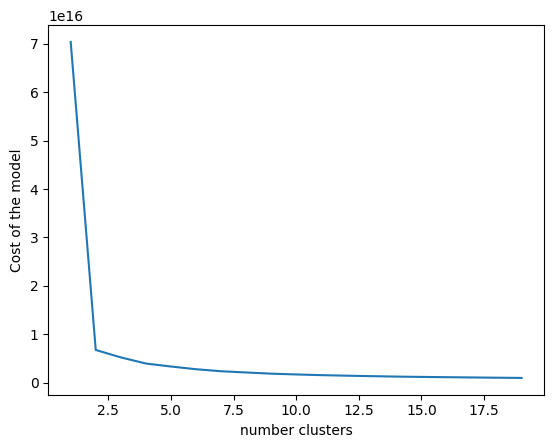

In [15]:

""" On trace le graphique en coude pour déterminer de façon arbitraire le nombre de clusters pour l'algorithme des K-means"""
inertia=[]
K_range=range(1,20)
for k in K_range:
    model=KMeans(n_clusters=k).fit(df)
    inertia.append(model.inertia_)
#On trace la fonction
plt.plot(K_range,inertia)
plt.xlabel('number clusters')
plt.ylabel('Cost of the model')



""" On standarise les variables pour les K-means"""

min_max_scaler = MinMaxScaler()
df_scale=df[['MNT_TOT_ASSURANCE_CRI', 'COUT_RACHAT_BRP', 'quotite', 'PCT_TEG_TAEG_CRI','BEST_APPORT_TX_BRP','proba_prediction']]
df_scale[['MNT_TOT_ASSURANCE_CRI', 'COUT_RACHAT_BRP', 'quotite', 'PCT_TEG_TAEG_CRI','BEST_APPORT_TX_BRP','proba_prediction']] = min_max_scaler.fit_transform(df_scale[['MNT_TOT_ASSURANCE_CRI', 'COUT_RACHAT_BRP', 'quotite', 'PCT_TEG_TAEG_CRI','BEST_APPORT_TX_BRP','proba_prediction']])
df_scale.head(10).style.set_caption("Variables standardisés OK")

In [16]:
""" Initialisation du modèle des K-means + fit + prédiction des clusters """
kmeans = KMeans(n_clusters= 3) # On demande 3 clusters car l'analyse de la fonction Elbow conclue qu'il y a 3 clusters
label = kmeans.fit_predict(df_scale)
""" """
df_scale["cluster"]=label
print("On vérifie que les classes ont suffisamment d'observations")
display(df_scale["cluster"].value_counts())
df['cluster']=label
df['date']=df_clustering['date_debloc_avec_crd']

On vérifie que les classes ont suffisamment d'observations


/var/folders/j3/7p5c8ygd7yg6bgkb6r90ddhm0000gn/T/ipykernel_77264/1889270993.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scale["cluster"]=label


2    39745
0    29586
1    15939
Name: cluster, dtype: int64

### 2. Stabilité temporelle

In [18]:
""" Importation du dataframe pre-processé pour le clustering avec prédictions des K-means"""
df_clustering_graph=pd.read_csv("output/dataframe_classification.csv")
df_clustering_graph = df_clustering_graph.drop('Unnamed: 0', axis=1)

### 3. Partie graphique, la stabilité des classes de risque

In [21]:
""" On créée un dataframe avec seulement les variables essentielles pour faire les graphiques """

df_graph = df_clustering_graph[['proba_prediction', 'cluster', 'date']]
display(df_graph.head(10))

,proba_prediction,cluster,date
0,0.009667,2,2014-05-01
1,0.011889,1,2014-05-01
2,0.060393,0,2014-07-01
3,0.005746,1,2014-07-01
4,0.007301,1,2014-05-01
5,0.004257,1,2015-02-01
6,0.024162,1,2014-05-01
7,0.013131,1,2014-07-01
8,0.012994,1,2014-09-01
9,0.009788,2,2014-08-01


#### Puis on crée des , ce qui permet de tracer les graphiques de stabilité

In [22]:
""" Création d'un groupby pour tracer les graphiques de stabilité temporelle"""
df_graph["date"]=pd.to_datetime(df_graph["date"],format="%Y-%m-%d") #On met en format date la date de déblocage des prêts
df_graph['intervalles_dates_annee']=df_graph['date'].map(lambda x: '{year}'.format(year=x.year)) #On crée une variable avec l'année
df_graph['intervalles_dates_semestre']=df_graph['date'].map(lambda x: '{year}-1'.format(year=x.year) if x.month<=6 else '{year}-2'.format(year=x.year)) #même chose avec le semestre
df_graph = df_graph.drop('date', axis=1) # On drop la date brute

""" On crée deux dataframes distincts pour avoir un graphique sur chaque intervalle de temps""" 
df_graph_semestre = df_graph.drop('intervalles_dates_annee', axis=1) 
df_graph_annee = df_graph.drop('intervalles_dates_semestre', axis=1)

""" Préparation des deux dataframes pour faire les graphiques """
df_groupby_semestre = pd.DataFrame(df_graph_semestre.groupby(["cluster", "intervalles_dates_semestre"])['proba_prediction'].mean())
df_groupby_annee = pd.DataFrame(df_graph_annee.groupby(["cluster", "intervalles_dates_annee"])['proba_prediction'].mean())

/var/folders/j3/7p5c8ygd7yg6bgkb6r90ddhm0000gn/T/ipykernel_77264/3607653636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graph["date"]=pd.to_datetime(df_graph["date"],format="%Y-%m-%d") #On met en format date la date de déblocage des prêts
/var/folders/j3/7p5c8ygd7yg6bgkb6r90ddhm0000gn/T/ipykernel_77264/3607653636.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_graph['intervalles_dates_annee']=df_graph['date'].map(lambda x: '{year}'.format(year=x.year)) #On crée une variable avec l'année
/v

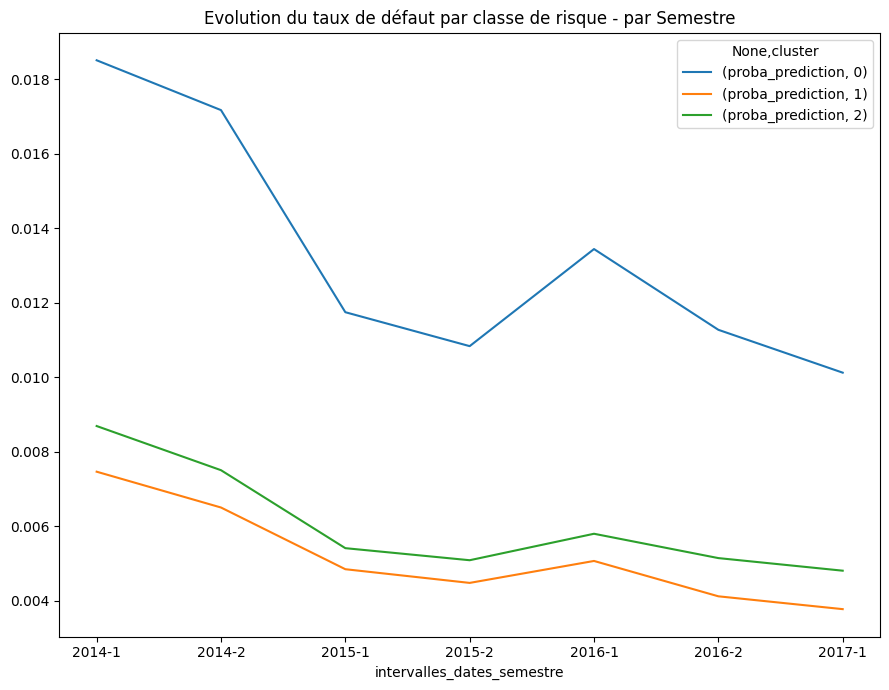

In [23]:
ax = df_groupby_semestre.unstack(level=0).plot(kind='line', subplots=False, rot=0, figsize=(9, 7), layout=(2, 3), title="Evolution du taux de défaut par classe de risque - par Semestre")
plt.tight_layout()


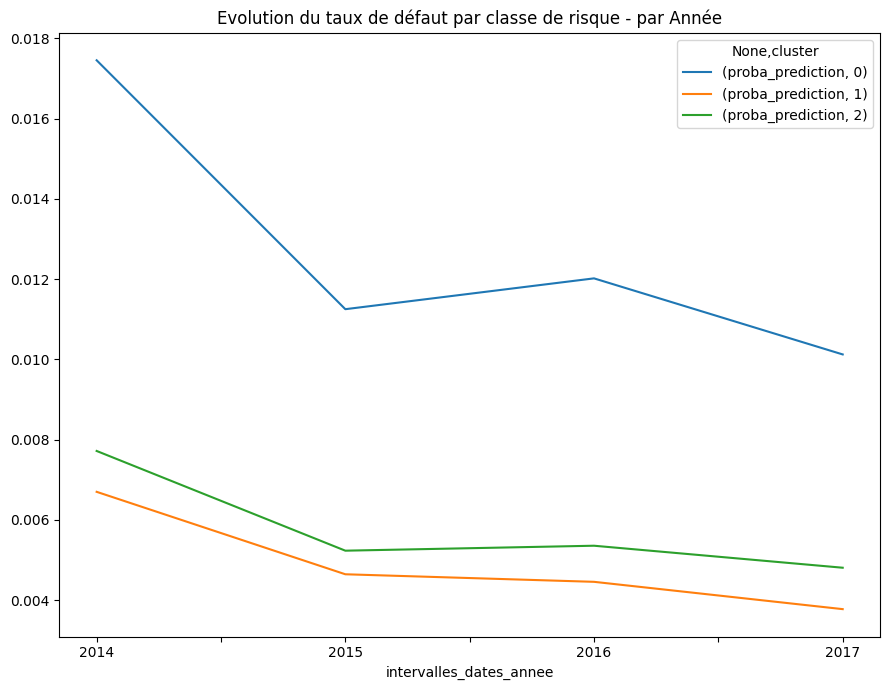

In [24]:
ax = df_groupby_annee.unstack(level=0).plot(kind='line', subplots=False, rot=0, figsize=(9, 7), layout=(2, 3), title="Evolution du taux de défaut par classe de risque - par Année")
plt.tight_layout()